In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 

from sklearn.model_selection import train_test_split, validation_curve  
from sklearn.linear_model import Ridge 
from sklearn import preprocessing 
from sklearn.metrics import r2_score 

import nbformat 
from IPython import get_ipython 


import numpy as np 
import pandas as pd 
import seaborn as sb 
movie_colen_data = pd.read_csv("../Datasets/Movie_collection_test.csv", header = 0) 
movie_colen_data 
movie_colen_data.shape 
movie_colen_data.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           106 non-null    int64  
 1   Marketin_expense     106 non-null    float64
 2   Production_expense   106 non-null    float64
 3   Multiplex_coverage   106 non-null    float64
 4   Budget               106 non-null    float64
 5   Movie_length         106 non-null    float64
 6   Lead_ Actor_Rating   106 non-null    float64
 7   Lead_Actress_rating  106 non-null    float64
 8   Director_rating      106 non-null    float64
 9   Producer_rating      106 non-null    float64
 10  Critic_rating        106 non-null    float64
 11  Trailer_views        106 

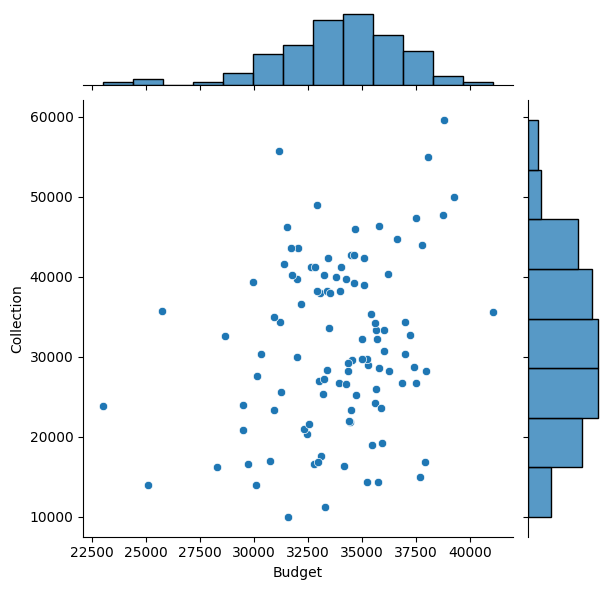

sb.jointplot(data=movie_colen_data,x="Production_expense", y="Collection") 


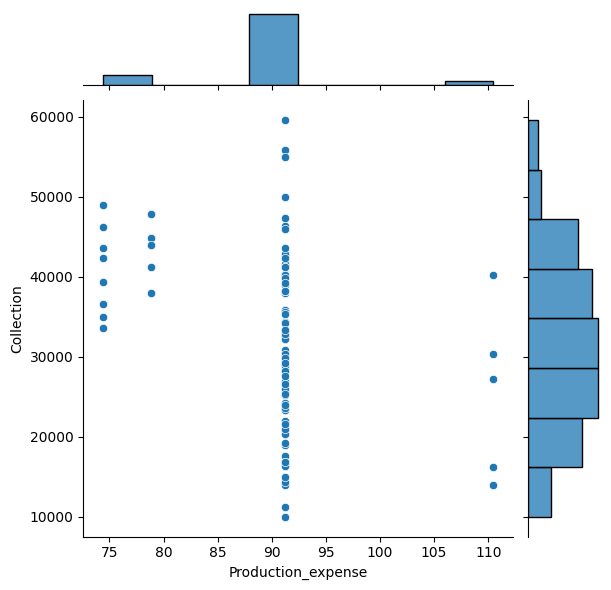

sb.jointplot(data=movie_colen_data, x="Budget", y="Production_expense") 


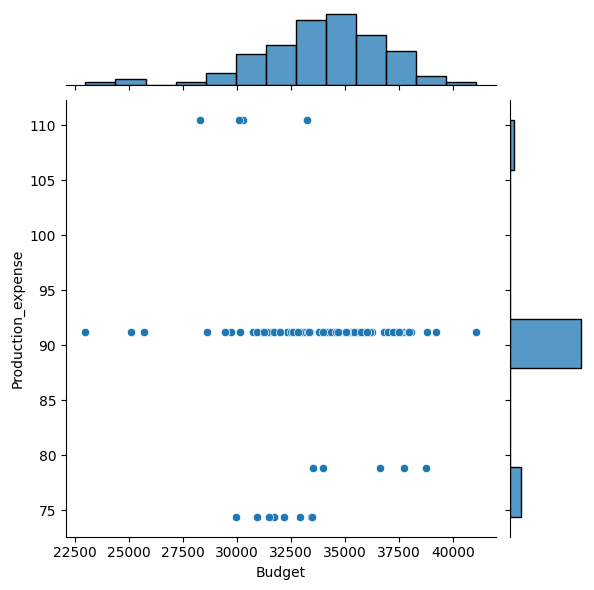

# sb.relplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  
sb.jointplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  


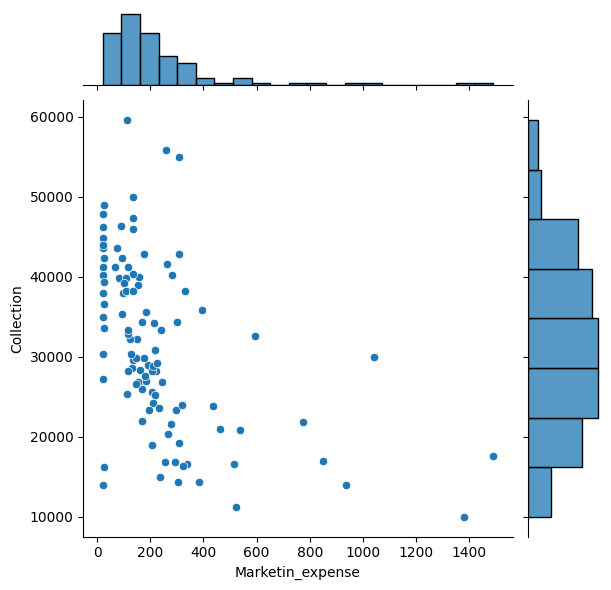

sb.jointplot(data=movie_colen_data, x="Budget", y="Marketin_expense") 


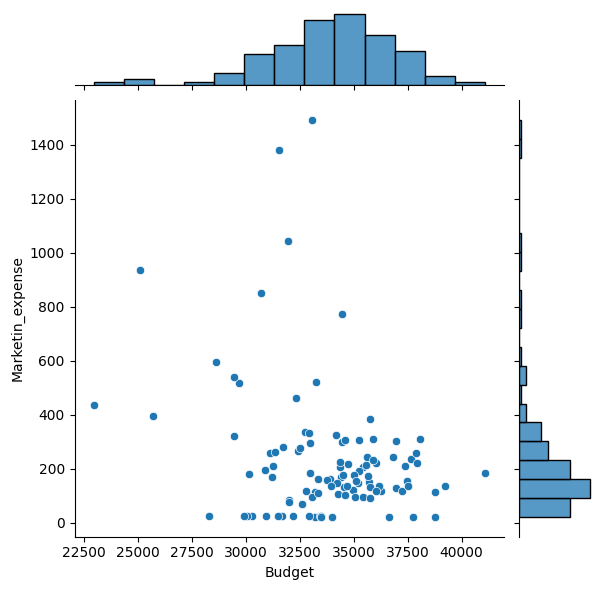

sb.jointplot(y="Marketin_expense", x="Production_expense", data=movie_colen_data) 


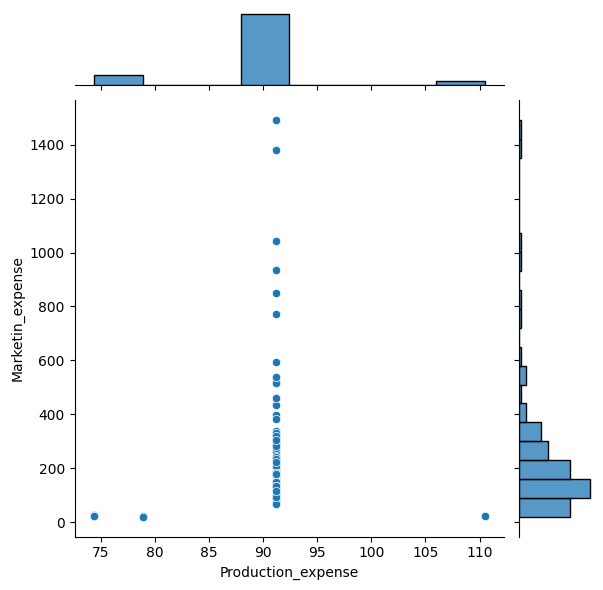

# movie_colen_data.Marketin_expense = np.log(2.35 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(2.5 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(2.0 + movie_colen_data.Marketin_expense) 
# movie_colen_data.Marketin_expense = np.log(0.4 + movie_colen_data.Marketin_expense) 

# movie_colen_data.Production_expense = np.exp(1.6 + movie_colen_data.Production_expense) 
# movie_colen_data.Production_expense = np.log(2.6 + movie_colen_data.Production_expense) 
# movie_colen_data 
# movie_colen_data.describe()     # Updated marketing expense attribute 
# sb.jointplot(data=movie_colen_data, x="Marketin_expense", y="Collection")  
# sb.jointplot(data=movie_colen_data, x="Production_expense", y="Collection")  
# sb.jointplot(data=movie_colen_data, x="Budget", y="Marketin_expense") 
# sb.jointplot(data=movie_colen_data, x="Budget", y="Production_expense") 
# sb.jointplot(y="Marketin_expense", x="Production_expense", data=mov

In [2]:
# %run "../Data_Preprocessing/data_preprocess.ipynb" 

with open("../Data_Preprocessing/data_preprocess_test.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("movies_test_data_cleaned" in cell.source or "movie_colen_data" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("Movies Test Clean Data : ")
    print(movies_test_data_cleaned.head(), sep='\n')      # type: ignore 

except NameError as e:
    print(f"Variable not found: {e}")

In [3]:
movies_test_data_cleaned      # type: ignore 

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,11200,520.9220,91.20,0.307,33257.785,173.5,9.135,9.310,9.040,9.335,...,308973,184.24,220.896,30,618,0,0,1,0,1
1,14400,304.7240,91.20,0.307,35235.365,173.5,9.120,9.330,9.095,9.305,...,374897,146.88,201.152,50,703,0,1,0,0,1
2,24200,211.9142,91.20,0.307,35574.220,173.5,9.170,9.320,9.115,9.120,...,359036,108.84,281.936,42,689,0,0,0,1,0
3,16600,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,...,384237,155.86,301.328,40,677,0,0,0,1,1
4,17000,850.5840,91.20,0.307,30724.705,158.9,9.050,9.220,9.185,9.330,...,312011,169.40,221.360,56,615,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,44800,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,...,492480,186.96,243.584,27,561,1,0,0,0,0
102,41200,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,...,482875,132.24,263.296,20,600,1,0,0,0,1
103,47800,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,...,532239,109.56,243.824,31,576,0,1,0,0,0
104,44000,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,...,496077,158.80,303.520,47,607,0,1,0,0,1


In [4]:
X_multi = movies_test_data_cleaned.drop('Collection', axis = 1)       # type: ignore 
X_multi  

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,520.9220,91.20,0.307,33257.785,173.5,9.135,9.310,9.040,9.335,7.96,308973,184.24,220.896,30,618,0,0,1,0,1
1,304.7240,91.20,0.307,35235.365,173.5,9.120,9.330,9.095,9.305,7.96,374897,146.88,201.152,50,703,0,1,0,0,1
2,211.9142,91.20,0.307,35574.220,173.5,9.170,9.320,9.115,9.120,7.96,359036,108.84,281.936,42,689,0,0,0,1,0
3,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,155.86,301.328,40,677,0,0,0,1,1
4,850.5840,91.20,0.307,30724.705,158.9,9.050,9.220,9.185,9.330,7.96,312011,169.40,221.360,56,615,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,1,0,0,0,0
102,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,1,0,0,0,1
103,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,0,1,0,0,0
104,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,0,1,0,0,1


In [5]:
y_multi = movies_test_data_cleaned['Collection']       # type: ignore 
y_multi 

0      11200
1      14400
2      24200
3      16600
4      17000
       ...  
101    44800
102    41200
103    47800
104    44000
105    38000
Name: Collection, Length: 106, dtype: int64

Train - Test Split :

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, random_state = 0)    

print(f" X_train size : {X_train.shape} \n X_test size : {X_test.shape} \n y_train size : {y_train.shape} \n y_test size : {y_test.shape}") 

 X_train size : (74, 20) 
 X_test size : (32, 20) 
 y_train size : (74,) 
 y_test size : (32,)


Scalar formation for X values - 

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train) 

X_train_s = scaler.transform(X_train) 
X_test_s = scaler.transform(X_test) 

Ridge Regression - 

In [8]:
lin_model_r = Ridge(alpha = 0.6)     # alpha ~ theoretical lambda value 
lin_model_r.fit(X_train_s, y_train) 

r2 = r2_score(y_test, lin_model_r.predict(X_test_s)) 
print(f"r2 score = {r2}") 

r2 score = 0.38867095788547756


In [9]:
param_rg = np.logspace(-2, 8, 100)     # 100 values from 10^-2 to 10^8 
param_rg   # Range of alphas 

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [10]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_rg, scoring='r2')  
# This is running K-Fold Cross Validation bts.. 
print(f" Train score : \n{train_scores} \nTest score : \n{test_scores}") 

 Train score : 
[[7.35110057e-01 7.14530287e-01 7.96053920e-01 7.06108628e-01
  8.52318373e-01]
 [7.35109834e-01 7.14528709e-01 7.96052705e-01 7.06107884e-01
  8.52318038e-01]
 [7.35109481e-01 7.14526219e-01 7.96050786e-01 7.06106709e-01
  8.52317511e-01]
 [7.35108926e-01 7.14522303e-01 7.96047764e-01 7.06104857e-01
  8.52316679e-01]
 [7.35108057e-01 7.14516160e-01 7.96043019e-01 7.06101947e-01
  8.52315374e-01]
 [7.35106701e-01 7.14506562e-01 7.96035593e-01 7.06097389e-01
  8.52313332e-01]
 [7.35104595e-01 7.14491636e-01 7.96024022e-01 7.06090279e-01
  8.52310149e-01]
 [7.35101345e-01 7.14468564e-01 7.96006089e-01 7.06079245e-01
  8.52305215e-01]
 [7.35096364e-01 7.14433155e-01 7.95978477e-01 7.06062232e-01
  8.52297620e-01]
 [7.35088802e-01 7.14379297e-01 7.95936298e-01 7.06036205e-01
  8.52286021e-01]
 [7.35077442e-01 7.14298264e-01 7.95872489e-01 7.05996767e-01
  8.52268482e-01]
 [7.35060591e-01 7.14177935e-01 7.95777060e-01 7.05937699e-01
  8.52242273e-01]
 [7.35035953e-01 7.14002

In [11]:
train_mean = np.mean(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 

print(f" Train mean : {train_mean} \n Test mean : {test_mean}") 

 Train mean : [7.60824253e-01 7.60823434e-01 7.60822141e-01 7.60820106e-01
 7.60816911e-01 7.60811915e-01 7.60804136e-01 7.60792092e-01
 7.60773570e-01 7.60745325e-01 7.60702689e-01 7.60639112e-01
 7.60545677e-01 7.60410688e-01 7.60219461e-01 7.59954527e-01
 7.59596369e-01 7.59124741e-01 7.58520341e-01 7.57766352e-01
 7.56849183e-01 7.55757794e-01 7.54481365e-01 7.53005576e-01
 7.51308251e-01 7.49355366e-01 7.47098404e-01 7.44473677e-01
 7.41403735e-01 7.37800221e-01 7.33566921e-01 7.28601451e-01
 7.22794218e-01 7.16024083e-01 7.08151006e-01 6.99006507e-01
 6.88382716e-01 6.76020733e-01 6.61599905e-01 6.44732473e-01
 6.24972108e-01 6.01847789e-01 5.74932208e-01 5.43943741e-01
 5.08864048e-01 4.70036736e-01 4.28207135e-01 3.84476620e-01
 3.40174123e-01 2.96678266e-01 2.55239669e-01 2.16847357e-01
 1.82161826e-01 1.51513207e-01 1.24946598e-01 1.02291413e-01
 8.32348738e-02 6.73868075e-02 5.43298890e-02 4.36545193e-02
 3.49803451e-02 2.79674970e-02 2.23206345e-02 1.77883912e-02
 1.4160172

In [12]:
max(test_mean) 

np.float64(0.31443972772158585)

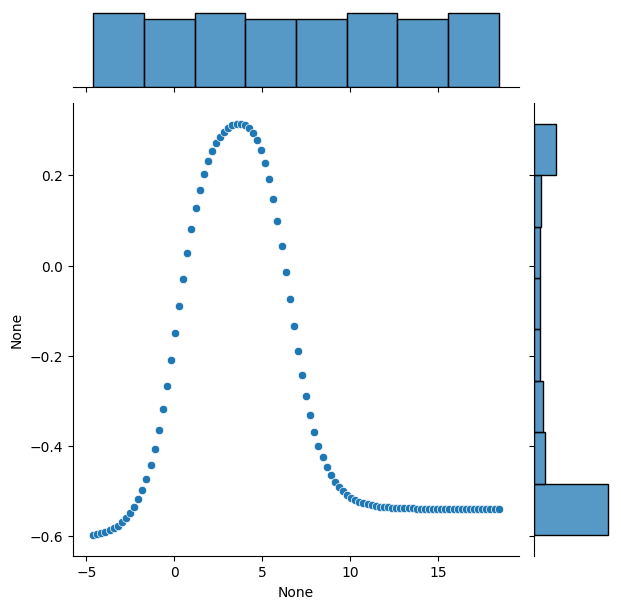

In [13]:
sb.jointplot(x = np.log(param_rg), y = test_mean)  

In [14]:
max_test_avg = np.where(test_mean == max(test_mean)) 
print(max_test_avg)  
print(param_rg[36]) 

(array([36]),)
43.28761281083057


Best case with max value of the set  

In [15]:
lin_model_r_best = Ridge(alpha = param_rg[36])  
lin_model_r_best.fit(X_train_s, y_train) 

r2 = r2_score(y_train, lin_model_r_best.predict(X_train_s)) 
print(f"r2 train score = {r2}") 

r2 = r2_score(y_test, lin_model_r_best.predict(X_test_s)) 
print(f"r2 test score = {r2}") 

r2 train score = 0.6796725121859761
r2 test score = 0.3430918002744887
